#**Objectif du projet : Nettoyage et exploration de la base de données Open Food Facts de Santé publique France afin de permettre la création d’un système de suggestion ou d’auto-complétion des nouveaux produits**

**Plan d'action**

1.   Selection des features
2.   Détection et traitement des doublons, des valeurs abérantes et atypiques
3.   Détection et traitement des valeurs manquantes
4.   Analyse univariée
5.   Analyse bivariée (ANOVA)
6.   Analyse multivariée (ACP)






#**Data Pre-processing**

## **Importation des packages**

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.preprocessing as StandardScaler
import scipy.stats as stats

##**Chargement du jeu de données et informations générales sur le jeu de données**

### **Chargement du fichier**

In [83]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/Projet 2 (1)/fr.openfoodfacts.org.products.csv", low_memory=False, delimiter='\t')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Affiche des 5 premières lignes**

In [84]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **Affichage des 5 dernières lignes**

In [85]:
df.tail()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,openfoodfacts-contributors,1490631299,2017-03-27T16:14:59Z,1491244498,2017-04-03T18:34:58Z,Tomato & ricotta,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,http://world-fr.openfoodfacts.org/produit/9956...,usda-ndb-import,1489059076,2017-03-09T11:31:16Z,1491244499,2017-04-03T18:34:59Z,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
320769,9970229501521,http://world-fr.openfoodfacts.org/produit/9970...,tomato,1422099377,2015-01-24T11:36:17Z,1491244499,2017-04-03T18:34:59Z,乐吧泡菜味薯片,Leba pickle flavor potato chips,50 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,9980282863788,http://world-fr.openfoodfacts.org/produit/9980...,openfoodfacts-contributors,1492340089,2017-04-16T10:54:49Z,1492340089,2017-04-16T10:54:49Z,Tomates aux Vermicelles,NaN,67g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320771,999990026839,http://world-fr.openfoodfacts.org/produit/9999...,usda-ndb-import,1489072709,2017-03-09T15:18:29Z,1491244499,2017-04-03T18:34:59Z,"Sugar Free Drink Mix, Peach Tea",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **Affichage dde la taille du dataset**

In [86]:
df.shape

(320772, 162)

### Notre jeu de données contient 320772 lignes et 162 features

### **Affichage de quelques informations pratiques sur le dataset**

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


### Parmi les features, il y a 106 variable float, et 56 variables object. Notre variable cible est : nutrition-score-fr_100g

In [88]:
df['nutrition_grade_fr'].value_counts()

d    62763
c    45538
e    43030
a    35634
b    34245
Name: nutrition_grade_fr, dtype: int64

### **Affichage des noms des features du dataset**

In [89]:
df.columns.values

array(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity', 'packaging', 'packaging_tags',
       'brands', 'brands_tags', 'categories', 'categories_tags',
       'categories_fr', 'origins', 'origins_tags', 'manufacturing_places',
       'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_fr',
       'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo',
       'cities', 'cities_tags', 'purchase_places', 'stores', 'countries',
       'countries_tags', 'countries_fr', 'ingredients_text', 'allergens',
       'allergens_fr', 'traces', 'traces_tags', 'traces_fr',
       'serving_size', 'no_nutriments', 'additives_n', 'additives',
       'additives_tags', 'additives_fr', 'ingredients_from_palm_oil_n',
       'ingredients_from_palm_oil', 'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil',
   

### **Affichage du taux de valeurs manquantes par feature**

In [90]:
NA = pd.DataFrame(data=[df.isnull().sum().tolist(), ["{:.2f}".format(i)+'%'
                                                            for i in (df.isna().sum()/df.shape[0]*100).tolist()]],
                  columns=df.columns, index=['NA Count', 'NA Percent']).transpose()

NA.style.background_gradient(cmap="Pastel1_r", subset=['NA Count'])

,NA Count,NA Percent
code,23,0.01%
url,23,0.01%
creator,2,0.00%
created_t,3,0.00%
created_datetime,9,0.00%
last_modified_t,0,0.00%
last_modified_datetime,0,0.00%
product_name,17762,5.54%
generic_name,267977,83.54%
quantity,215953,67.32%


# **Data Préparation**

## **Suppresion des features dont le taux de remplissage est inférieur à 50**

In [91]:
data = df.dropna(axis=1, thresh = len(df)/2)
data.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,brands_tags,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,Ferme t'y R'nao,ferme-t-y-r-nao,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000,14.0,14.0
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,torn-glasser,...,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,Grizzlies,grizzlies,...,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0,12.0
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,Bob's Red Mill,bob-s-red-mill,...,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN


##**Suppression des features en doublon ou des features qui sont moins pertinentes pour la suite de notre travail**

In [92]:
data.drop(columns=['url', 'creator', 'created_datetime', 'created_t', 'last_modified_t', 'last_modified_datetime', 'brands',
                   'brands_tags', 'countries', 'countries_tags', 'countries_fr', 'serving_size', 'additives_n', 'additives',
                   'ingredients_text', 'ingredients_from_palm_oil_n','ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n',
                   'states', 'states_tags', 'states_fr', 'fat_100g', 'carbohydrates_100g', 'salt_100g',
                   'nutrition-score-uk_100g'], axis=1, inplace=True)

<ipython-input-92-9327827b8843>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['url', 'creator', 'created_datetime', 'created_t', 'last_modified_t', 'last_modified_datetime', 'brands',


## **Réintegration des features pertinentes mais avec un remplissage inférieur à 50%**

In [93]:
data[['pnns_groups_1']] = df[['pnns_groups_1']]

<ipython-input-93-390c9dd62d2b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['pnns_groups_1']] = df[['pnns_groups_1']]


## **Réorganisation des features et affichages d'information générales sur le dataset final**

In [94]:
data = pd.DataFrame.reindex(data,columns = ['code', 'product_name', 'pnns_groups_1', 'energy_100g','saturated-fat_100g', 'sugars_100g', 'sodium_100g','proteins_100g', 'fiber_100g', 'nutrition-score-fr_100g', 'nutrition_grade_fr'])

In [95]:
display(data.shape)

display(data.head())

display(data.info())

(320772, 11)

,code,product_name,pnns_groups_1,energy_100g,saturated-fat_100g,sugars_100g,sodium_100g,proteins_100g,fiber_100g,nutrition-score-fr_100g,nutrition_grade_fr
0,0000000003087,Farine de blé noir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,Banana Chips Sweetened (Whole),NaN,2243.0,28.57,14.29,0.000,3.57,3.6,14.0,d
2,0000000004559,Peanuts,NaN,1941.0,0.00,17.86,0.250,17.86,7.1,0.0,b
3,0000000016087,Organic Salted Nut Mix,NaN,2540.0,5.36,3.57,0.482,17.86,7.1,12.0,d
4,0000000016094,Organic Polenta,NaN,1552.0,NaN,NaN,NaN,8.57,5.7,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   code                     320749 non-null  object 
 1   product_name             303010 non-null  object 
 2   pnns_groups_1            91513 non-null   object 
 3   energy_100g              261113 non-null  float64
 4   saturated-fat_100g       229554 non-null  float64
 5   sugars_100g              244971 non-null  float64
 6   sodium_100g              255463 non-null  float64
 7   proteins_100g            259922 non-null  float64
 8   fiber_100g               200886 non-null  float64
 9   nutrition-score-fr_100g  221210 non-null  float64
 10  nutrition_grade_fr       221210 non-null  object 
dtypes: float64(7), object(4)
memory usage: 26.9+ MB


None

In [96]:
data.nunique()

code                       320749
product_name               221347
pnns_groups_1                  14
energy_100g                  3997
saturated-fat_100g           2197
sugars_100g                  4068
sodium_100g                  5291
proteins_100g                2503
fiber_100g                   1016
nutrition-score-fr_100g        55
nutrition_grade_fr              5
dtype: int64

In [97]:
data.describe(include ='object')

,code,product_name,pnns_groups_1,nutrition_grade_fr
count,320749,303010,91513,221210
unique,320749,221347,14,5
top,0000000003087,Ice Cream,unknown,d
freq,1,410,22624,62763


## **Traitement des doublons**

### **Affichage des doublons ayant les mêmes information sur l'ensemble des features**

In [98]:
print('Il y a' , data.duplicated(keep=False).sum(), 'dans notre jeu de données')

Il y a 12 dans notre jeu de données


In [99]:
data.loc[data.duplicated(keep=False),:]

,code,product_name,pnns_groups_1,energy_100g,saturated-fat_100g,sugars_100g,sodium_100g,proteins_100g,fiber_100g,nutrition-score-fr_100g,nutrition_grade_fr
189152,NaN,France,NaN,NaN,NaN,NaN,NaN,0.158,NaN,NaN,NaN
189162,NaN,France,NaN,NaN,NaN,NaN,NaN,0.158,NaN,NaN,NaN
189168,NaN,France,NaN,NaN,NaN,NaN,NaN,0.120,NaN,NaN,NaN
189242,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189244,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189248,NaN,France,NaN,NaN,NaN,NaN,NaN,0.120,NaN,NaN,NaN
189250,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189345,NaN,France,NaN,NaN,NaN,NaN,NaN,0.120,NaN,NaN,NaN
189362,NaN,France,NaN,NaN,NaN,NaN,NaN,0.180,NaN,NaN,NaN
189364,NaN,France,NaN,NaN,NaN,NaN,NaN,0.180,NaN,NaN,NaN


### **Suppresion des doublons**

In [100]:
data = data.drop_duplicates().reset_index(drop=True)



##**Traitement des valeurs aberrantes et outliers**



###**Détection d'éventuels outliers des variables numeriques avec la fonction describe**

In [101]:
data.describe()

,energy_100g,saturated-fat_100g,sugars_100g,sodium_100g,proteins_100g,fiber_100g,nutrition-score-fr_100g
count,2.611130e+05,229554.000000,244971.000000,255463.000000,259917.000000,200886.000000,221210.000000
mean,1.141915e+03,5.129932,16.003484,0.798815,7.076073,2.862111,9.165535
std,6.447154e+03,8.014238,22.327284,50.504428,8.409080,12.867578,9.055903
min,0.000000e+00,0.000000,-17.860000,0.000000,-800.000000,-6.700000,-15.000000
25%,3.770000e+02,0.000000,1.300000,0.025000,0.700000,0.000000,1.000000
50%,1.100000e+03,1.790000,5.710000,0.229000,4.760000,1.500000,10.000000
75%,1.674000e+03,7.140000,24.000000,0.541000,10.000000,3.600000,16.000000
max,3.251373e+06,550.000000,3520.000000,25320.000000,430.000000,5380.000000,40.000000


A travers cette description des valeurs numeriques, on remarque qu'il existe des valeurs abérantes au sein des features 'energy_100g', 'saturated-fat_100g', 'sugars_100g, 'sodium_100g', 'proteins_100g', 'fiber_100g'. En effet, il est impossible d'avoir des proportions négatives ou des proportions > 100g sur 100g d'un produit.
Quant à l'énergie, selon les informations à notre connaissance, l'aliment le énergétique apporte environ 900 Kcal soit 3600 KJ pour 100d de produit. Nous allons donc considerer toutes les valeurs supérieure à 4000 Kj comme valeurs aberrantes.
Concernant la features 'nutrition-score-fr_100g', leurs valeurs extrêmes sont réaliste et ne sauraient être considérées comme des valeurs abérantes. La valeur minimale réelle du nutri-score est de -15 et sa valeur maximale est de 40. En somme toutes les valeurs de cette 2 variable sont bonnes

### **Affichage des outiliers par le biais des boxplots**

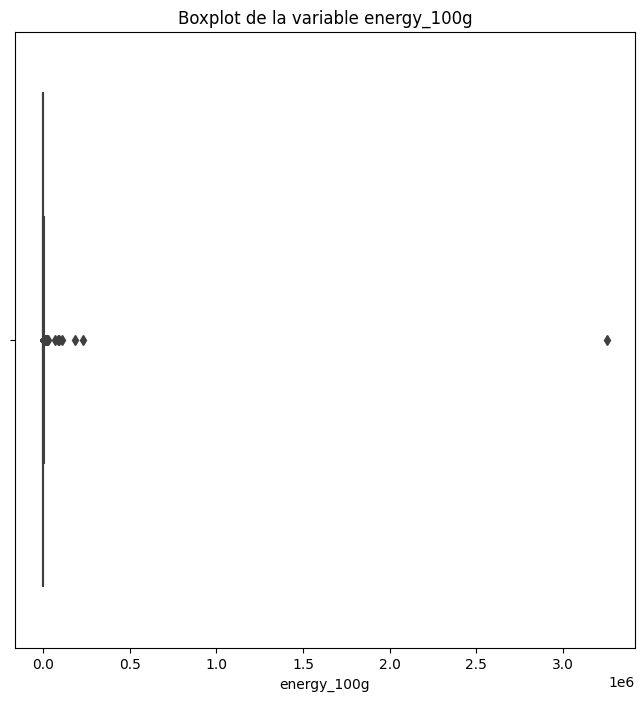

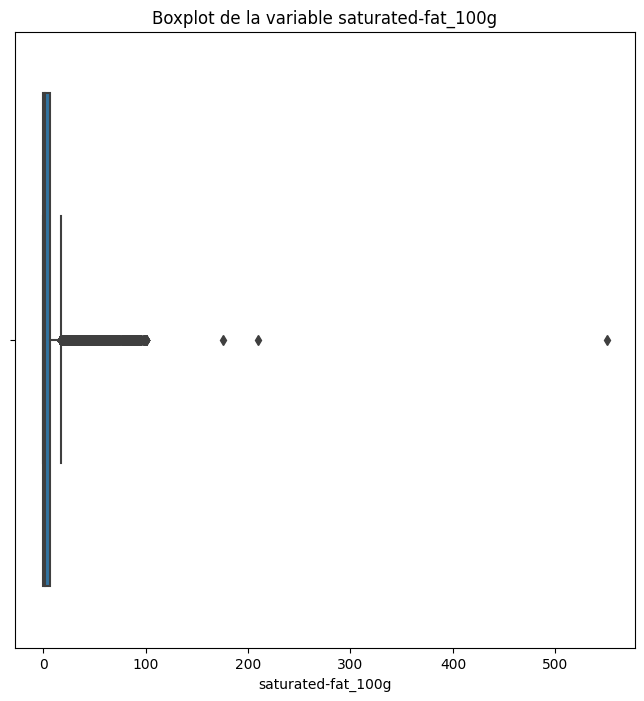

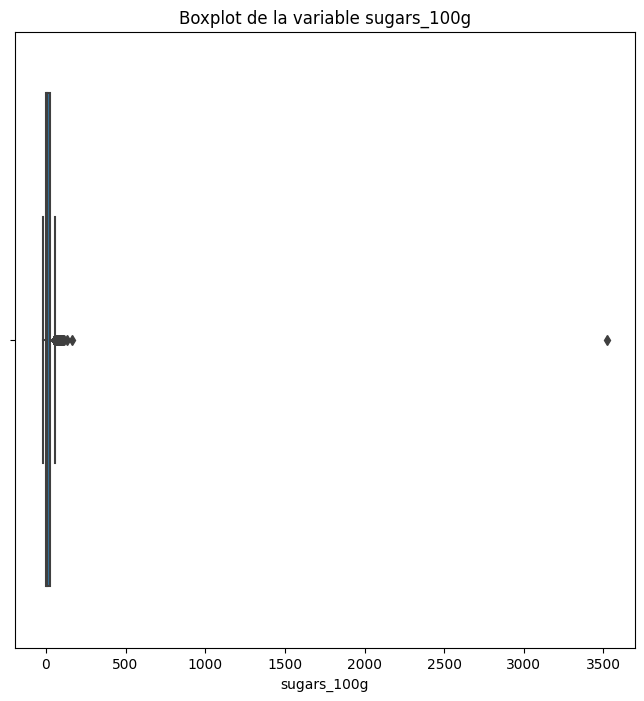

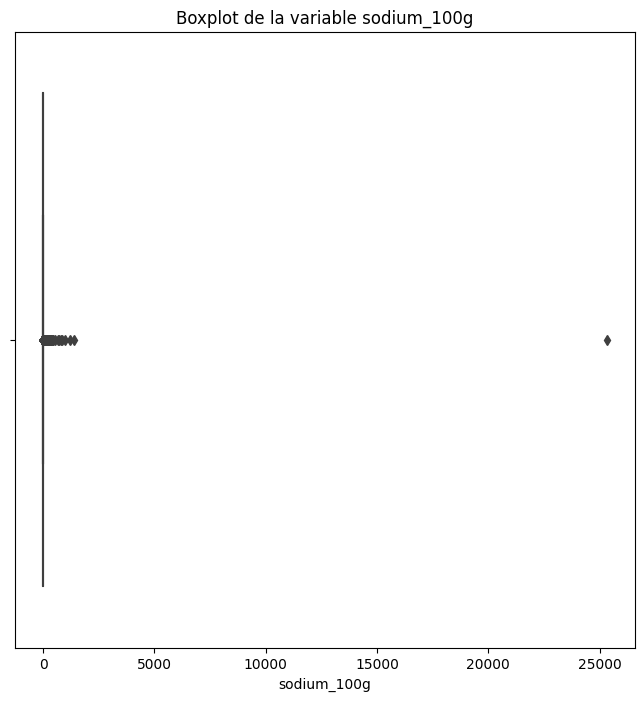

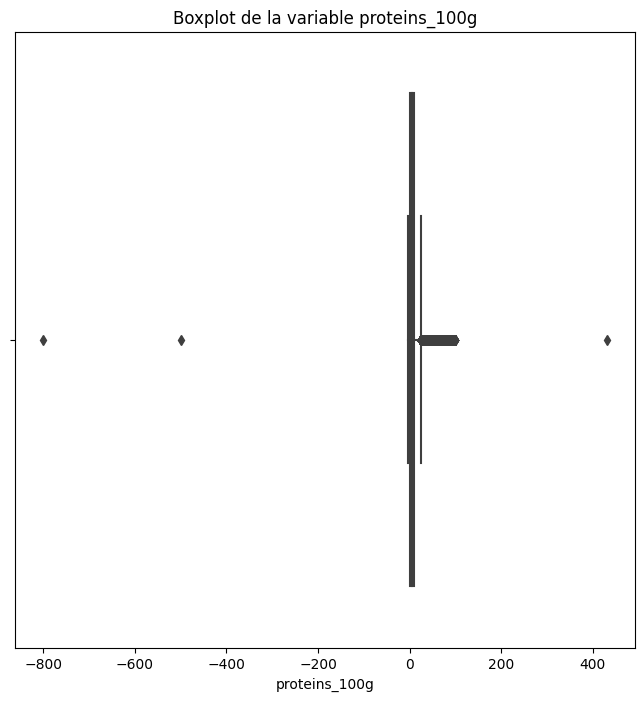

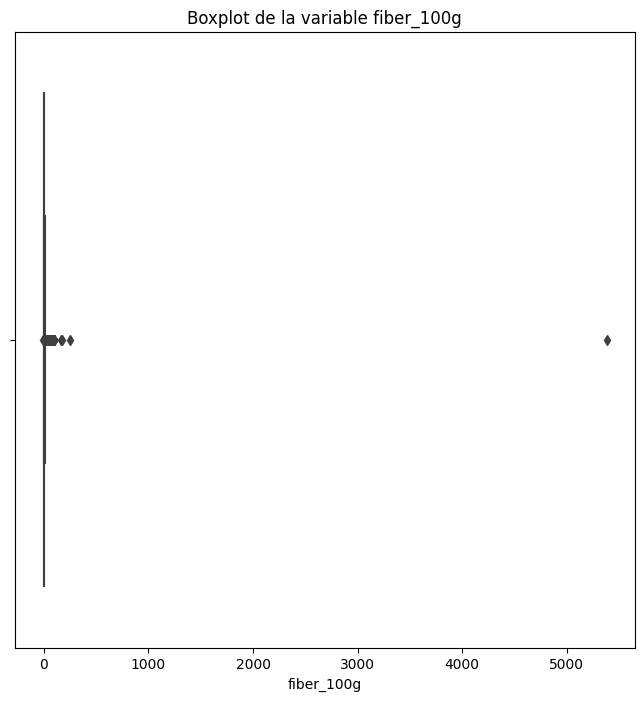

In [102]:
columns = data[['energy_100g','saturated-fat_100g', 'sugars_100g', 'sodium_100g','proteins_100g', 'fiber_100g']]
for column in columns.columns[:]:
    plt.figure(figsize=(8, 8))
    sns.boxplot(data=data, x =column)
    plt.title(f"Boxplot de la variable {column}")
    plt.show()

Ces boxplots mettent en evidence la présence de valeurs abérantes qui sont nettement visibles dans les 2 extrémitées de chaque boxplot. Ces valeurs abérantes rendent les boxplots presque illisibles.

### **Suppression des valeurs abérantes sur chaque features**

In [103]:
data['energy_100g']  = np.where(data['energy_100g']>4000, np.nan, data['energy_100g'])
data['saturated-fat_100g'] = np.where((data['saturated-fat_100g'] < 0) | (data['saturated-fat_100g']> 100), np.nan, data['saturated-fat_100g'])
data['sugars_100g'] = np.where((data['sugars_100g'] < 0) | (data['sugars_100g']> 100), np.nan, data['sugars_100g'])
data['sodium_100g'] = np.where((data['sodium_100g'] < 0) | (data['sodium_100g']> 100), np.nan, data['sodium_100g'])
data['proteins_100g'] = np.where((data['proteins_100g'] < 0) | (data['proteins_100g']> 100), np.nan, data['proteins_100g'])
data['fiber_100g'] = np.where((data['fiber_100g'] < 0) | (data['fiber_100g']> 100), np.nan, data['fiber_100g'])

In [104]:
data.isnull().sum()

code                           15
product_name                17762
pnns_groups_1              229251
energy_100g                 59805
saturated-fat_100g          91213
sugars_100g                 75812
sodium_100g                 65335
proteins_100g               60851
fiber_100g                 119883
nutrition-score-fr_100g     99554
nutrition_grade_fr          99554
dtype: int64

### **Définition d'une fonction qui remplace les outliers par des NaN**

In [105]:
features = ['energy_100g', 'saturated-fat_100g', 'sugars_100g', 'sodium_100g', 'proteins_100g', 'fiber_100g']
def impute_outliers_iqr(dt, feature):
  Q1 = dt[feature].quantile(0.25)
  Q3 = dt[feature].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR

  dt.loc[dt[feature]<= lower_bound, feature]= np.nan
  dt.loc[dt[feature]>= upper_bound, feature]= np.nan

### **Application de la fonction aux outliers de notre dataset**

In [106]:
for feature in features:
  impute_outliers_iqr(data, feature)

## **Traitement des valeurs manquantes**


### **Affichage du nombre de valeurs manquantes par features**

In [107]:
data.isnull().sum()

code                           15
product_name                17762
pnns_groups_1              229251
energy_100g                 60731
saturated-fat_100g         108457
sugars_100g                 91108
sodium_100g                 81788
proteins_100g               73440
fiber_100g                 134273
nutrition-score-fr_100g     99554
nutrition_grade_fr          99554
dtype: int64

In [108]:
display(data.loc[data['code'].isnull(), :])
display(data.loc[data['product_name'].isnull(), :])

,code,product_name,pnns_groups_1,energy_100g,saturated-fat_100g,sugars_100g,sodium_100g,proteins_100g,fiber_100g,nutrition-score-fr_100g,nutrition_grade_fr
189068,NaN,"Belgique,France",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189103,NaN,France,NaN,NaN,NaN,NaN,NaN,0.137,NaN,NaN,NaN
189109,NaN,"Belgique,France,Suisse",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189119,NaN,France,NaN,NaN,NaN,NaN,NaN,0.122,NaN,NaN,NaN
189152,NaN,France,NaN,NaN,NaN,NaN,NaN,0.158,NaN,NaN,NaN
189160,NaN,France,NaN,NaN,NaN,NaN,NaN,0.156,NaN,NaN,NaN
189167,NaN,France,NaN,NaN,NaN,NaN,NaN,0.120,NaN,NaN,NaN
189241,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189256,NaN,France,NaN,NaN,NaN,NaN,NaN,0.132,NaN,NaN,NaN
189258,NaN,France,NaN,NaN,NaN,NaN,NaN,0.133,NaN,NaN,NaN


,code,product_name,pnns_groups_1,energy_100g,saturated-fat_100g,sugars_100g,sodium_100g,proteins_100g,fiber_100g,nutrition-score-fr_100g,nutrition_grade_fr
48,0000000027205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,0000007020254,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187,0000009336247,NaN,Sugary snacks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,0000050157846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233,0000069105241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
320739,9800895250,NaN,Sugary snacks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320740,9802735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320744,98709870987,NaN,Beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320747,988639,NaN,Sugary snacks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


On peut s'appercevoir que toutes les lignes n'ayant pas de codes ou n'ayant pas de noms ont également les autres cases non renseignées. Ne s'agissant que de seulement 23 lignes pour l'une et 17762 lignes pour l'autre, on peut decider de tout simplement ces lignes

In [109]:
data.dropna(subset= ['code'], inplace=True)
data.dropna(subset= ['product_name'], inplace=True)

### **Affichage des lignes avec un valeurs manquantes sur la feature 'fiber_100g'**

In [110]:
data.loc[data['fiber_100g'].isnull(), :]

,code,product_name,pnns_groups_1,energy_100g,saturated-fat_100g,sugars_100g,sodium_100g,proteins_100g,fiber_100g,nutrition-score-fr_100g,nutrition_grade_fr
0,0000000003087,Farine de blé noir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0000000016117,Organic Long Grain White Rice,NaN,1490.0,NaN,NaN,NaN,8.89,NaN,NaN,NaN
7,0000000016124,Organic Muesli,NaN,1833.0,4.69,15.62,0.055,14.06,NaN,7.0,c
9,0000000016513,Organic Sunflower Oil,NaN,3586.0,7.14,NaN,NaN,NaN,NaN,NaN,NaN
10,0000000016612,Organic Adzuki Beans,NaN,1393.0,NaN,NaN,NaN,22.92,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
320757,9935010000003,Rillette d'oie,Fish Meat Eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320759,9948282780603,Tomato & ricotta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320761,9970229501521,乐吧泡菜味薯片,Salty snacks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320762,9980282863788,Tomates aux Vermicelles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Pour le traitement de ces valeurs manquantes, nous allons tout simplement les remplacer par 0. En effet, la majorité des produits alimentaires ne contiennent pas de fibres ou ont une teneur en fibre proche de 0

In [111]:
data['fiber_100g'] = data['fiber_100g'].fillna(0)

### **Affichage du nombre de lignes avec un valeurs manquantes sur la feature 'pnns_groups_1'**

In [112]:
data['pnns_groups_1'].isnull().sum()

214489

Le nombre de valeurs manquantes sur cette varaible est trop élévé. Une imputation par une mésure centrique risque de biaiser nos analyses. Comme il existe déjà une 'unknown' dans les renseignements, nous allons reverser ces valeurs manquantes dans cette catégorie 'unknown'**

In [113]:
data['pnns_groups_1']= data['pnns_groups_1'].fillna('unknown')

**Quant aux features 'saturated-fat_100g', 'sugars_100g', 'sodium_100g',  'proteins_100g', nous allons appliquer une imputation par la médian en vue de minimiser la perte d'informations sur nos données**

In [114]:
from sklearn.impute import SimpleImputer
imputer_median = SimpleImputer(missing_values=np.nan, strategy='median', copy=False)
data["sugars_100g"] = imputer_median.fit_transform(data[["sugars_100g"]])
data["sodium_100g"] = imputer_median.fit_transform(data[["sodium_100g"]])
data["proteins_100g"] = imputer_median.fit_transform(data[["proteins_100g"]])

### **Les feature 'energy_100g' et 'saturated-fat_100g' sont corrélées entre elles même si cette corrération n'est pas forte. Nous allons donc utiliser l'IterativeImputer pour traiter leurs valeurs manquantes**

In [115]:
features = data[['energy_100g', 'saturated-fat_100g' ]]

In [116]:
features

,energy_100g,saturated-fat_100g
0,NaN,NaN
1,2243.0,NaN
2,1941.0,0.00
3,2540.0,5.36
4,1552.0,NaN
...,...,...
320759,NaN,NaN
320760,0.0,0.00
320761,NaN,NaN
320762,NaN,NaN


In [117]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp_median = IterativeImputer(random_state=0)
features["energy_100g"] = imp_median.fit_transform(features[["energy_100g"]])
features["saturated-fat_100g"] = imp_median.fit_transform(features[["saturated-fat_100g"]])

<ipython-input-117-7f01ef202749>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features["energy_100g"] = imp_median.fit_transform(features[["energy_100g"]])
<ipython-input-117-7f01ef202749>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features["saturated-fat_100g"] = imp_median.fit_transform(features[["saturated-fat_100g"]])


In [118]:
data[['energy_100g', 'saturated-fat_100g' ]] = features

### **Quant à la feature 'nutrition-score-fr_100g', nous utiliser la méthode KNN pour remplacer les valeurs manquantes**

In [119]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
data["nutrition-score-fr_100g"] = imp_median.fit_transform(data[["nutrition-score-fr_100g"]])

### **Remplacement des valeurs manquantes par le mode (nutrition_grade_fr)**

In [126]:
mode_nutri = data["nutrition_grade_fr"].mode()
data["nutrition_grade_fr"] = data["nutrition_grade_fr"].fillna(mode_nutri[0])

### **Harmonisation de la colonne 'pnns_groups_1**

In [121]:
data["pnns_groups_1"].value_counts()

unknown                    234643
Sugary snacks               12267
Beverages                    8898
Milk and dairy products      8774
Cereals and potatoes         8376
Fish Meat Eggs               7984
Composite foods              6725
Fruits and vegetables        5870
Fat and sauces               5164
Salty snacks                 2789
fruits-and-vegetables         986
sugary-snacks                 494
cereals-and-potatoes           16
salty-snacks                    1
Name: pnns_groups_1, dtype: int64

Nous allons regrouper les groupes identiques en unifiant leur denomination

In [122]:
data.loc[data['pnns_groups_1'] == 'sugary-snacks', 'pnns_groups_1'] = 'Sugary snacks'
data.loc[data['pnns_groups_1'] == 'cereals-and-potatoes', 'pnns_groups_1'] = 'Cereals and potatoes'
data.loc[data['pnns_groups_1'] == 'fruits-and-vegetables', 'pnns_groups_1'] = 'Fruits and vegetables'
data.loc[data['pnns_groups_1'] == 'salty-snacks', 'pnns_groups_1'] = 'Salty snacks'

### **Vérification de valeurs manquantes dans le nouveau dataset**

In [127]:
data.isnull().sum()

code                       0
product_name               0
pnns_groups_1              0
energy_100g                0
saturated-fat_100g         0
sugars_100g                0
sodium_100g                0
proteins_100g              0
fiber_100g                 0
nutrition-score-fr_100g    0
nutrition_grade_fr         0
dtype: int64

In [130]:
data.dtypes

code                        object
product_name                object
pnns_groups_1               object
energy_100g                float64
saturated-fat_100g         float64
sugars_100g                float64
sodium_100g                float64
proteins_100g              float64
fiber_100g                 float64
nutrition-score-fr_100g    float64
nutrition_grade_fr          object
dtype: object

#**Analyse univariée**

##**Brève description des features numeriques**

In [128]:
data.describe()

,energy_100g,saturated-fat_100g,sugars_100g,sodium_100g,proteins_100g,fiber_100g,nutrition-score-fr_100g
count,302987.000000,302987.000000,302987.000000,302987.000000,302987.000000,302987.000000,302987.000000
mean,1113.395627,3.497429,10.264788,0.262135,5.559957,1.158180,9.151724
std,719.378965,3.782831,13.471165,0.272084,5.431978,1.952258,7.686868
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,467.000000,0.200000,2.300000,0.040000,1.250000,0.000000,3.000000
50%,1113.395627,3.497429,4.790000,0.188000,4.210000,0.000000,9.151724
75%,1584.000000,3.497429,11.630000,0.385827,7.400000,1.800000,14.000000
max,3619.000000,17.840000,58.000000,1.314961,23.940000,8.930000,40.000000


## **Brève description des features catégorielles**

In [129]:
data.describe(include= 'object')

,code,product_name,pnns_groups_1,nutrition_grade_fr
count,302987,302987,302987,302987
unique,302987,221343,10,5
top,0000000003087,Ice Cream,unknown,d
freq,1,410,234643,146543


## **Représentation graphique du dataset par la variable nutri_cat**

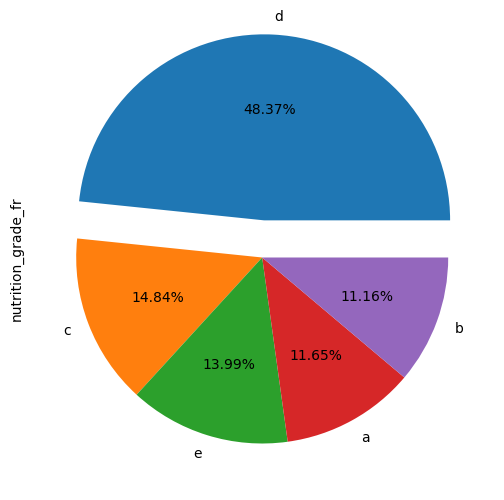

In [132]:
data["nutrition_grade_fr"].value_counts(normalize=True).plot(kind='pie', autopct = lambda x: str(round(x, 2)) + '%', explode = [0.2, 0, 0, 0, 0], figsize=(6,7))
plt.show()


Près de la moitié des aliments de notre jeu de données sont de la categorie C du nutri_score. Après cette catogorie, la categorie D est la 2ème avec environ 21% de l'effectif total. Les 3 autres categories ont quasiment le même nombre de produits

### **Représentation graphique de la part de chaque catégorie du nutri-score**

(Text(0.5, 1.0, 'Repartion des produits par groupe PNNS'),)

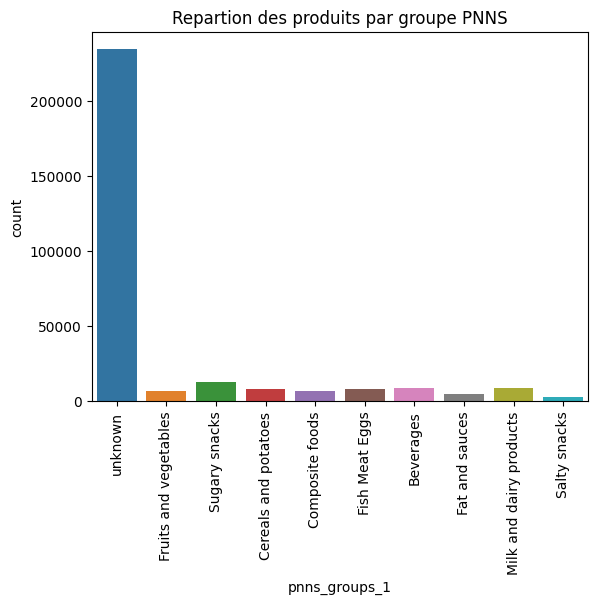

In [133]:
sns.countplot(x=data['pnns_groups_1'])
plt.xticks(rotation=90)
plt.title('Repartion des produits par groupe PNNS'),

A part la catégorie des produits 'unknow', les snacks sucré et et les boisons sont les produits les plus renseignés tandis que les snacks salés sont très peu renseignés

### **Représentation graphique des features numerique du dataset par des

---

boxplots**

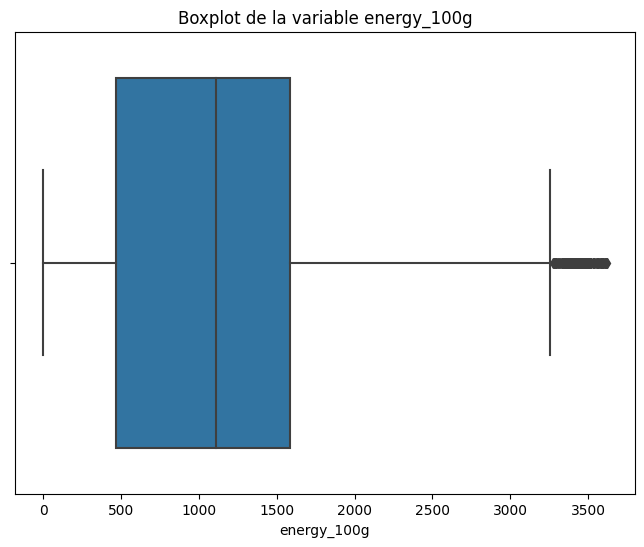

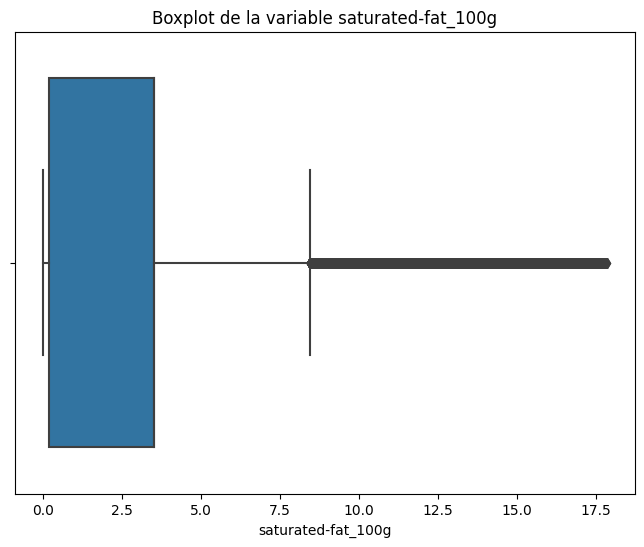

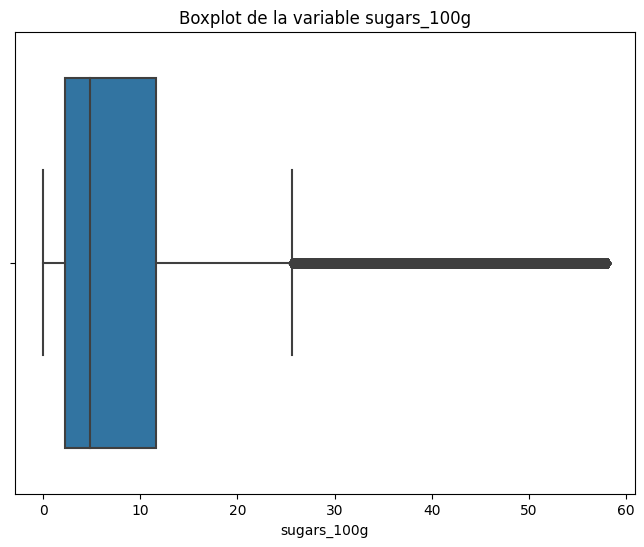

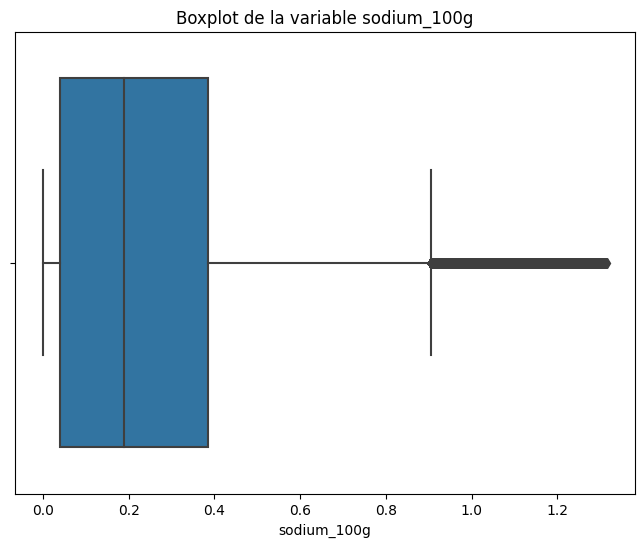

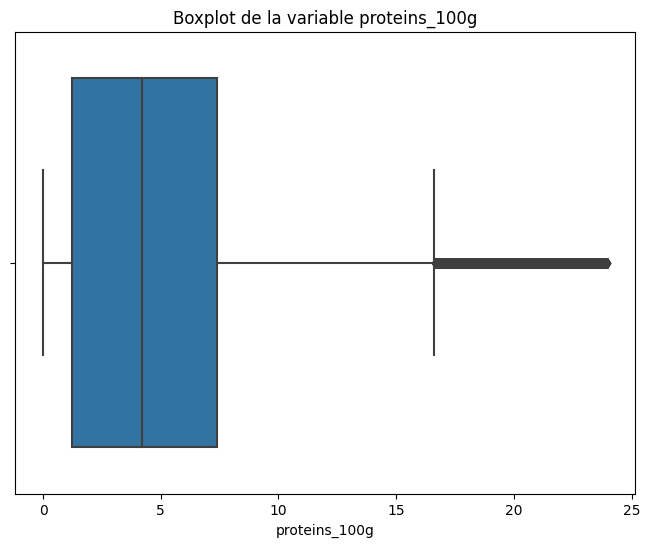

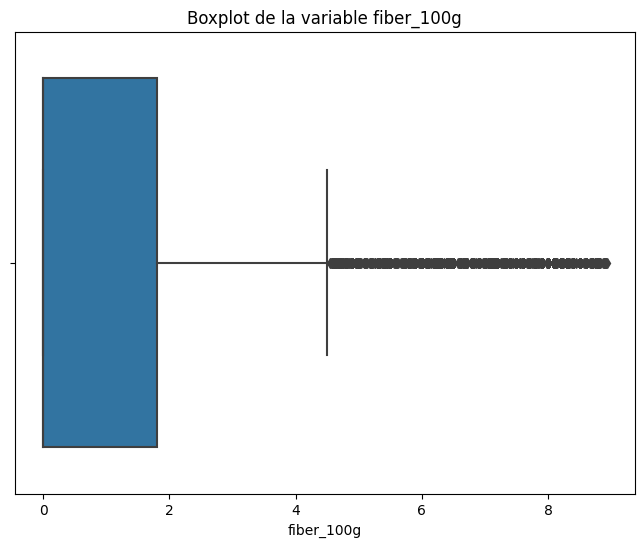

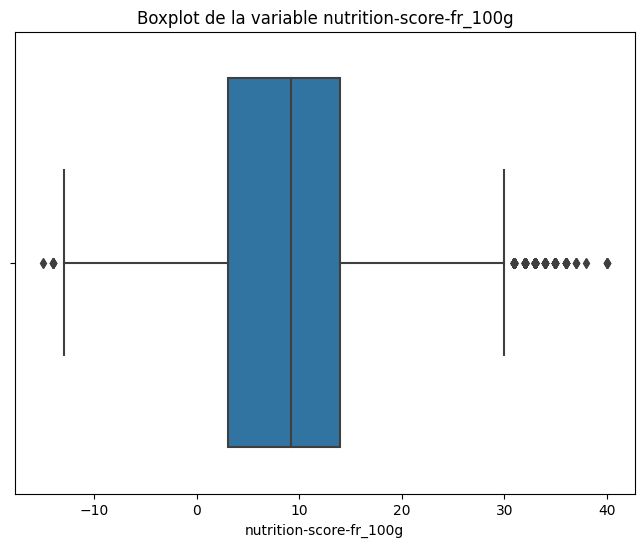

In [134]:
features = data[['energy_100g','saturated-fat_100g', 'sugars_100g', 'sodium_100g','proteins_100g', 'fiber_100g', 'nutrition-score-fr_100g']]
for column in features.columns[:]:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data, x =column)
    plt.title(f"Boxplot de la variable {column}")
    plt.show()

Malgré la suppression des ouliers intiaux, on remarque toujours des nouveaux outiliers dans chacune des boxplot. Cela sous entend que la distribution des features numeriques ne suit une loie normale. Autrement, les données sur les variables numériques ne sont pas homogènes

### **Quelques mesures de forme des features de notre dataset**

#**Analyse bivariée**

## **Analyse de la corrélation entre deux variables quantitatives**

### **Matrice de corrélation**

<ipython-input-135-6112f44853a5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(data.corr(), dtype=bool))
<ipython-input-135-6112f44853a5>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), mask=mask, center=0, cmap='RdYlGn',


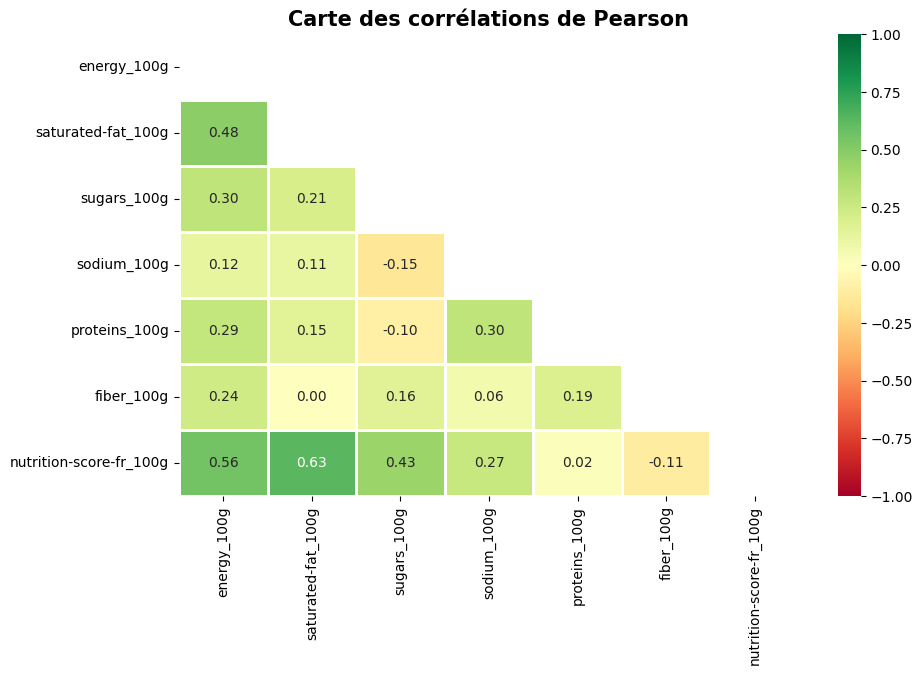

In [135]:
%matplotlib inline
plt.figure(figsize=(10,6))
mask = np.triu(np.ones_like(data.corr(), dtype=bool))
sns.heatmap(data.corr(), mask=mask, center=0, cmap='RdYlGn',
            linewidths=1, annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title('Carte des corrélations de Pearson', fontsize = 15, fontweight='bold')
plt.show()

De cette carte ressort une corrélation possitive et significative entre le nutri-score et l'énergy-100g et également entre le nutri-score et le saturated-fat. Cela signifie que que lorsque la teneur des aliments en sucre ou en énergie augmente, le nutri-score augmente également. Ce qui est logique car l'énergie et la graisse saturée sont des élements à limiter dans notre alimentation

### **Pairplot**

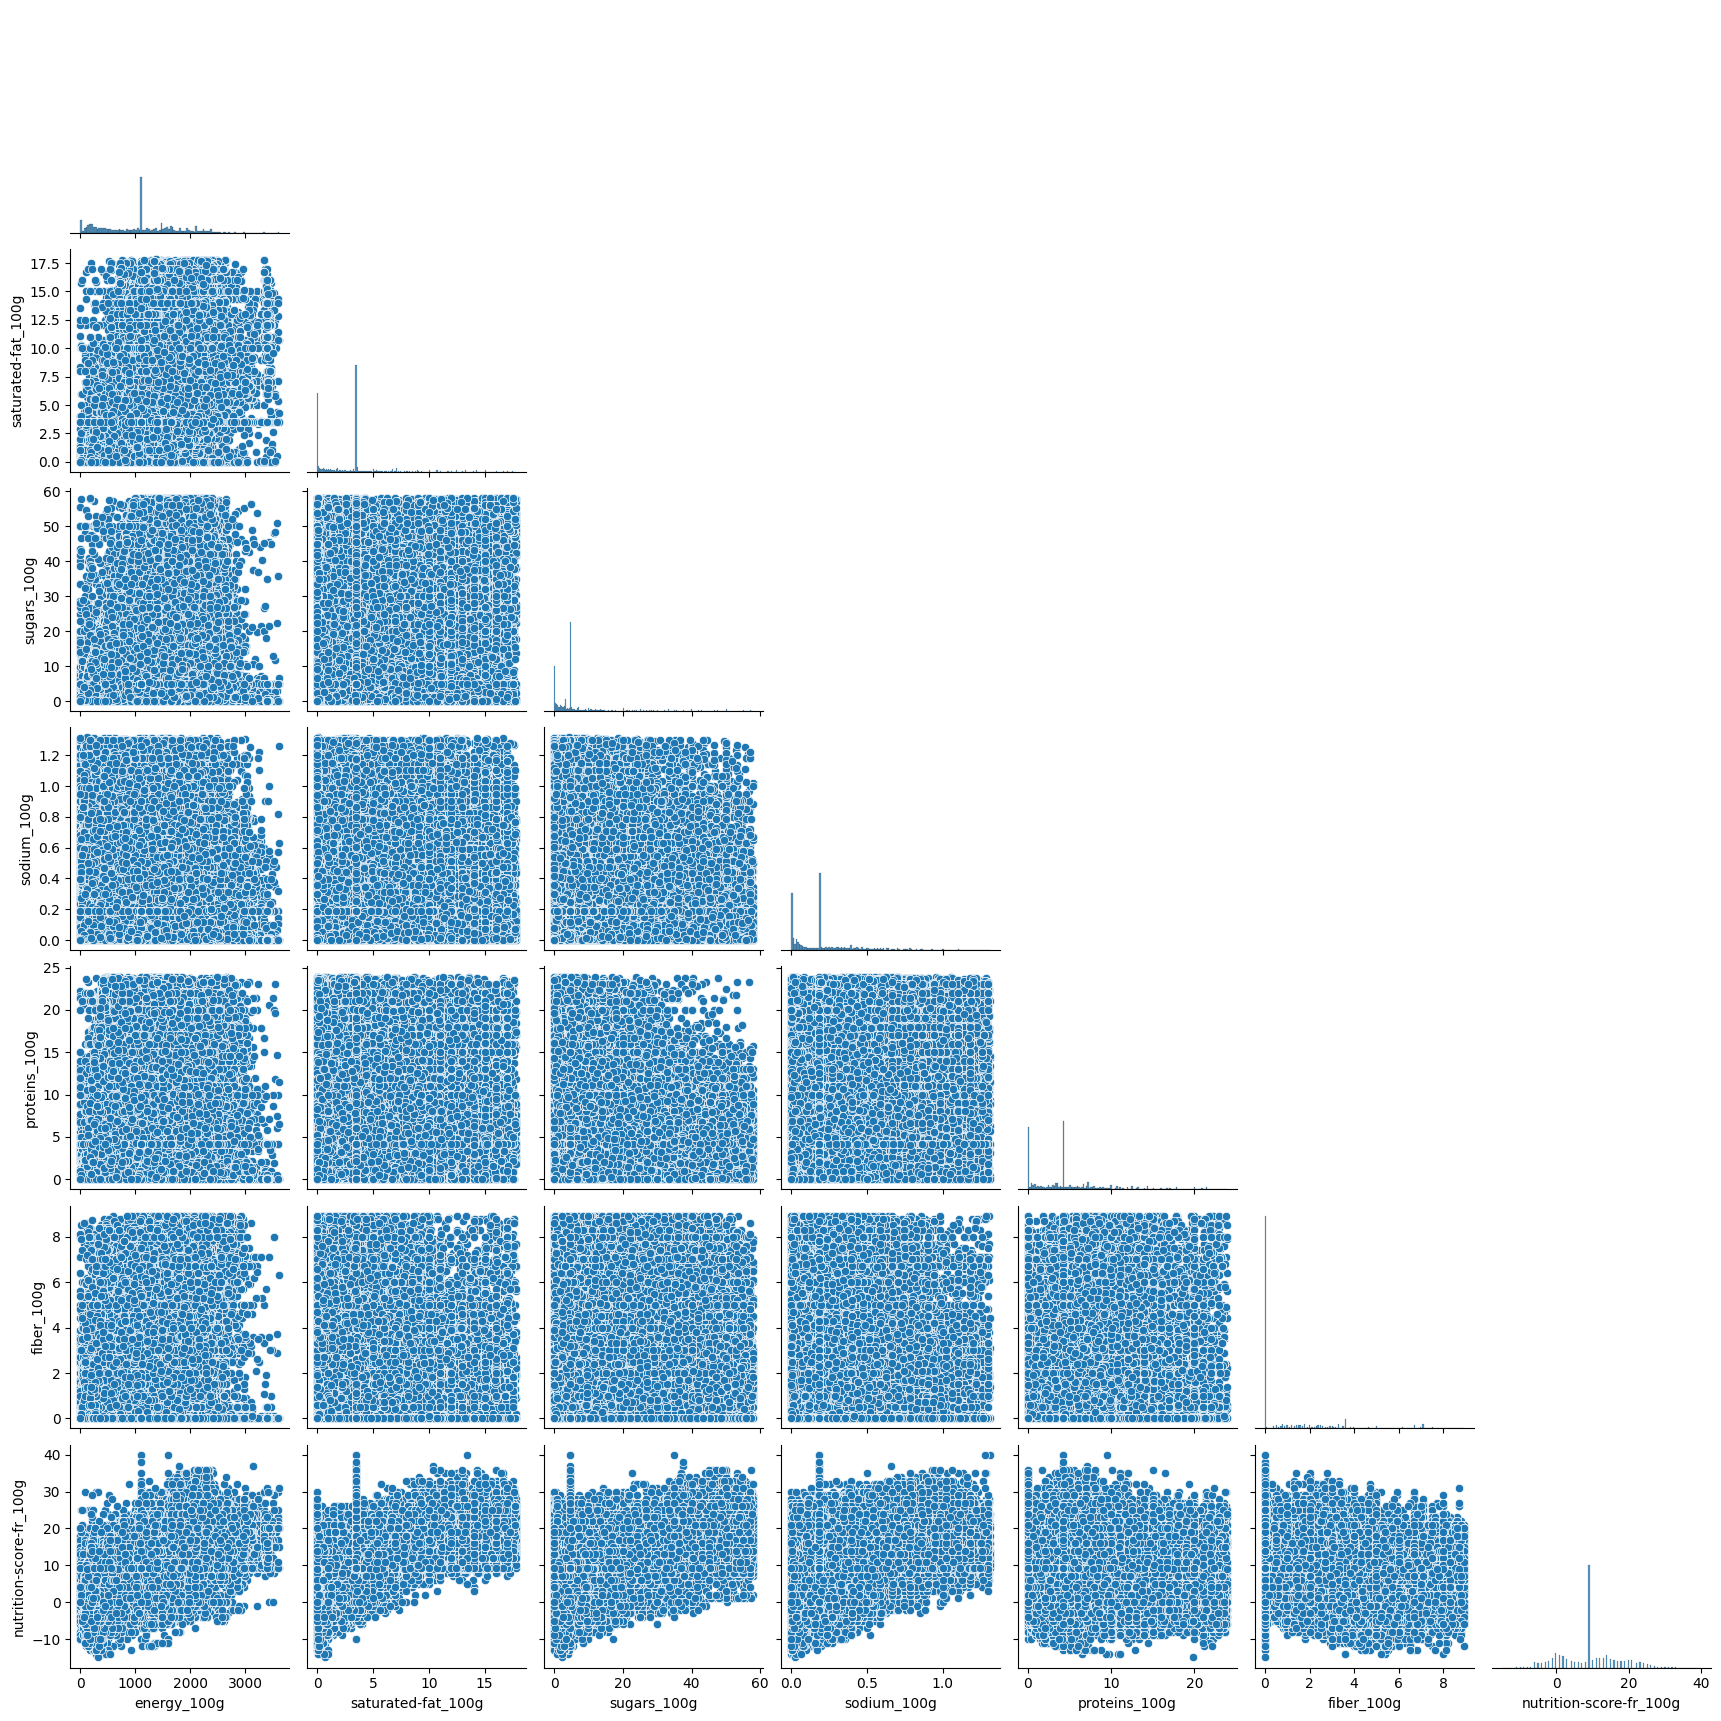

In [118]:
sns.pairplot(data, corner=True);

### **Nuage de points entre 'energy_100g' et 'saturated_100g'**

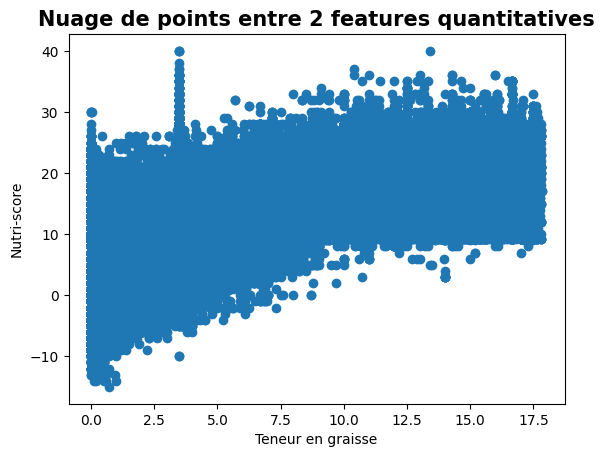

In [142]:
plt.scatter( x='saturated-fat_100g', y='nutrition-score-fr_100g', data=data)
plt.title('Nuage de points entre 2 features quantitatives', fontsize = 15, fontweight='bold')
plt.xlabel("Teneur en graisse")
plt.ylabel("Nutri-score")
plt.show()

Ce nuage de point confirme les resultats des 2 graphiques précedents. On y remarque nettement une corrélation positive entre la teneur en graisse et le nutri-score. Autrement dit, lorsque la teneur en graisse d'un aliment augemente, le nutri score augmente à son tour

### **Vérification par des tests statistiques**

In [163]:
from scipy.stats import pearsonr
pearsonr(data['saturated-fat_100g'], data['nutrition-score-fr_100g'])

PearsonRResult(statistic=0.6301938936434883, pvalue=0.0)

La p-value < 5%, on rejette donc l'hypothèse H0 qui stipule l'indepandance des 2 varaibles. On peut donc dire que les features 'saturated-fat_100g' et 'nutrition-score-fr_100g' sont corrélées positivement

## **Analysez deux variables qualitatives (pnns_group_1, nutri_cat) avec le Chi-2**

### **Diagramme en barres de 2 variables**

Text(0.5, 1.0, 'Répartion du groupe de nutri-score en fonction du pnns')

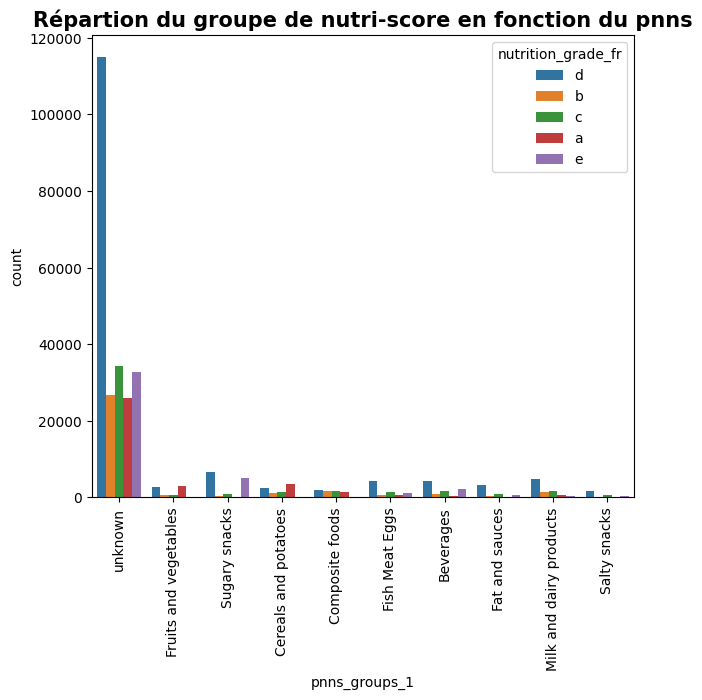

In [143]:
plt.figure(figsize=(7,6))
plt.xticks(rotation=90)
sns.countplot(x= 'pnns_groups_1', hue='nutrition_grade_fr', data=data),
plt.title('Répartion du groupe de nutri-score en fonction du pnns', fontsize = 15, fontweight='bold')

Au vue de ce diagramme on peut dire que la répartition des nutri-score n'est homogène au sein des différents groupe d'aliments. Les aliments de notation C sont plus présents dans les boissons, les poisons, viandes et oeufs. Tandis que les aliments de nutri-score E sont majoritaires dans les snacks sucrés

### **Tableau de contingence**

In [145]:
X = "nutrition_grade_fr"
Y = "pnns_groups_1"

cont = data[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

pnns_groups_1,Beverages,Cereals and potatoes,Composite foods,Fat and sauces,Fish Meat Eggs,Fruits and vegetables,Milk and dairy products,Salty snacks,Sugary snacks,unknown,Total
nutrition_grade_fr,,,,,,,,,,,
a,256,3423,1303,93,537,2935,634,55,68,25993,35297
b,812,1044,1762,243,735,707,1371,84,337,26715,33810
c,1548,1344,1582,967,1443,485,1691,664,869,34367,44960
d,4151,2469,2008,3136,4212,2726,4813,1621,6515,114892,146543
e,2131,112,70,725,1057,3,265,366,4972,32676,42377
Total,8898,8392,6725,5164,7984,6856,8774,2790,12761,234643,302987


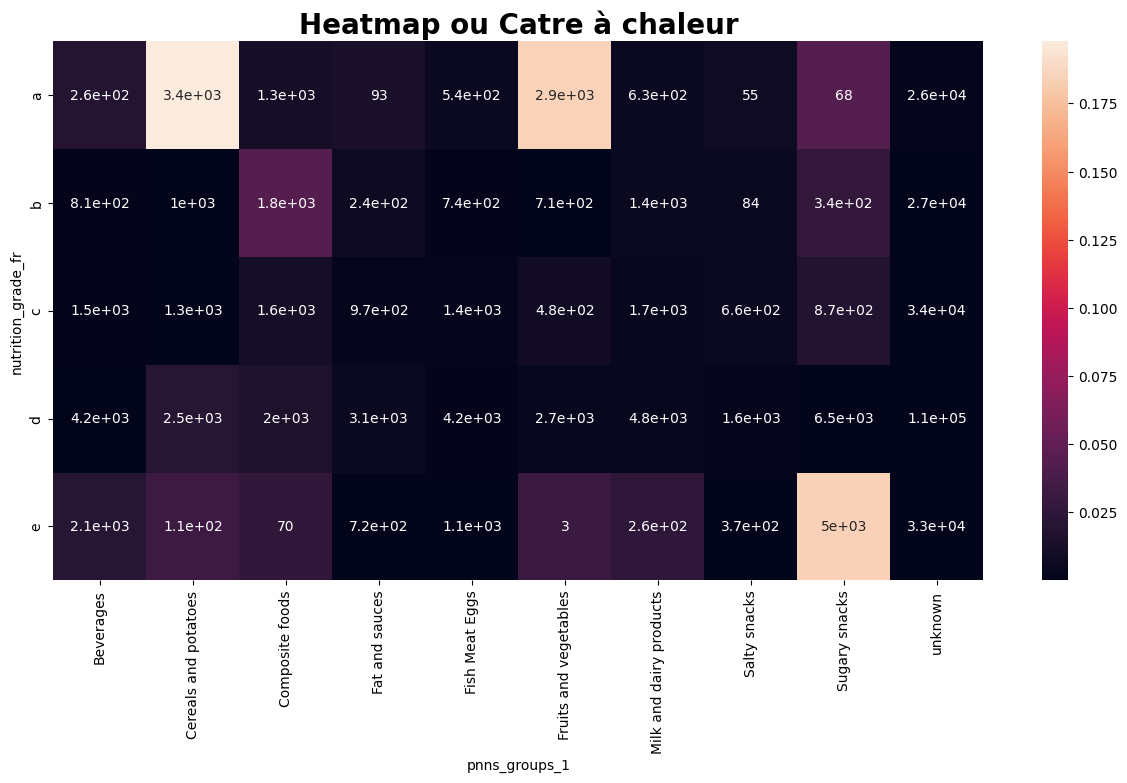

In [146]:
plt.figure(figsize=(15,7))
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(data)
indep = tx.dot(ty) / n

c = cont.fillna(0)
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.title('Heatmap ou Catre à chaleur', fontsize = 20, fontweight='bold')
plt.show()


**Brève analyse de la carte de chaleur**

Le groupe C du nutri-score est composé de presque tous les groupe pnns d'aliments saufs les boissons et les snacks sucrés qui peu représentés. Il y a une forte présence des poisons, oeufs et viandes dans le groupe A du nutri-score

**texte en gras**

### **Vérification par le test de chi2**

In [124]:
stats.chi2_contingency(cont, correction =True)

Chi2ContingencyResult(statistic=33406.32157979946, pvalue=0.0, dof=50, expected_freq=array([[  1038.70252519,    979.63492823,    785.03871453,
           602.81634526,    932.00730064,    800.33091849,
          1024.2274619 ,    325.68892395,   1489.64744032,
         27390.90544149,  35369.        ],
       [  1004.19559915,    947.0902976 ,    758.95880021,
           582.7900735 ,    901.04491612,    773.74297907,
           990.20141458,    314.8691528 ,   1440.15959101,
         26480.94717595,  34194.        ],
       [  3820.92989468,   3603.64617624,   2887.81226587,
          2217.49628862,   3428.4450752 ,   2944.06556057,
          3767.68250123,   1198.06635268,   5479.75796651,
        100759.09791839, 130107.        ],
       [  1840.37917798,   1735.722866  ,   1390.93616228,
          1068.0735081 ,   1651.33595831,   1418.03097823,
          1814.73217663,    577.05753052,   2639.3660025 ,
         48531.36563945,  62667.        ],
       [  1193.79280299,   1125.905

La p-value est inférieure 5%. Cela on rejette l'hypthèse nulle selon laquelle la catégorie de nutri-score est indépendante du groupe d'aliments. Il y a donc une corrélation entre le groupe auquel appartient un aliment et son score de nutrition

##**Analysez bi-variée entre une variable qualitative (nutri-score) et une variablele quantitative (fruits-vegetables-nuts_100g) par ANOVA**

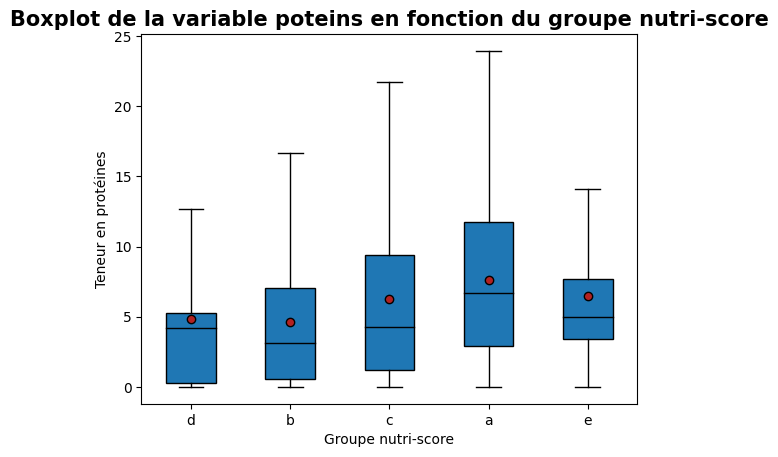

In [164]:
X = "nutrition_grade_fr"
Y = "proteins_100g"

modalites = data[X].unique()
groupes = []
for m in modalites:
    groupes.append(data[data[X]==m][Y])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops,
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title('Boxplot de la variable poteins en fonction du groupe nutri-score', fontsize = 15, fontweight='bold')
plt.xlabel("Groupe nutri-score")
plt.ylabel("Teneur en protéines")
plt.show()

### On peut remarquer ici que les produits ayant de la catégorie nutri-score A et ont une moyenne plus élévée en protéines par rapport aux autres catégories. Les categories C et E semblent avoir la même moyenne. Les categories Det B ont également des moyennes voisines. En termede dispersion, les categories A et C sont les plus dispersées, suivies des categories B. Les categoiries D et E ont des dributions en protéines plus concontrées ques les 3 autres catégories.

###**Vérification par un test eta-square**

In [150]:
sous_echantillon = data
X = "nutrition_grade_fr"
Y = "proteins_100g"

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

eta_squared(sous_echantillon[X],sous_echantillon[Y])

0.03449154150252401

eta-square = 0.03. Cela qu il y a un effet faible entre la teneur en protéines et la valeur du nutri-score

# **Analyse multivariée avec l'ACP**

## **Scaling**

In [173]:
data.columns

Index(['code', 'product_name', 'pnns_groups_1', 'energy_100g',
       'saturated-fat_100g', 'sugars_100g', 'sodium_100g', 'proteins_100g',
       'fiber_100g', 'nutrition-score-fr_100g', 'nutrition_grade_fr'],
      dtype='object')

In [172]:
X = data.drop(columns =['nutrition_grade_fr', 'product_name','pnns_groups_1', 'code', 'nutrition-score-fr_100g','energy_100g'])

In [174]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [175]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

**Choix des composantes principales**

In [176]:
pca = PCA()
X_pca=pca.fit_transform(X)

In [158]:
compr = pd.DataFrame(
    {"Dimension" : ["Dim" + str(X + 1) for X in range(5)],
        "Valeur propre" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)},
    columns = ["Dimension", "Valeur propre", "% variance expliquée", "% cum. var. expliquée"])

compr

,Dimension,Valeur propre,% variance expliquée,% cum. var. expliquée
0,Dim1,182.573582,80.0,80.0
1,Dim2,30.133999,13.0,93.0
2,Dim3,12.893831,6.0,98.0
3,Dim4,3.507046,2.0,100.0
4,Dim5,0.065371,0.0,100.0


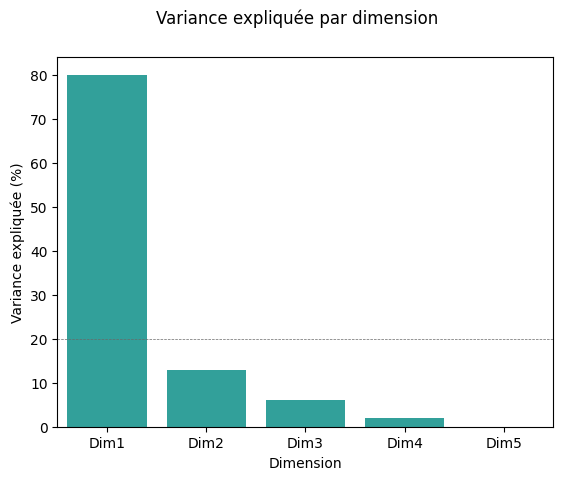

In [177]:
g_comp = sns.barplot(x = "Dimension",
                y = "% variance expliquée",
                palette = ["lightseagreen"],
                data = compr)
g_comp.set(ylabel = "Variance expliquée (%)")
g_comp.figure.suptitle("Variance expliquée par dimension")
plt.axhline(y = 20, linewidth = .5, color = "dimgray", linestyle = "--")

Les deux (02) prémières composantes explique 93% de l'information totale. Nous allons doc nous limiter à 2 composnates principales

In [178]:
# Calcul du cosinus carré des variables
cos_squared = np.square(pca.components_)

# Création d'un dataframe pandas avec le cosinus carré des variables
data_cos_squared = pd.DataFrame(cos_squared, columns=['PC{}'.format(i+1) for i in range(X.shape[1])])
data_cos_squared.index = X.columns[:]

print(data_cos_squared)

                         PC1       PC2       PC3       PC4       PC5
saturated-fat_100g  0.003829  0.993466  0.000009  0.002180  0.000516
sugars_100g         0.046066  0.000932  0.000222  0.946729  0.006052
sodium_100g         0.947161  0.004680  0.000016  0.042729  0.005414
proteins_100g       0.002894  0.000913  0.000022  0.008183  0.987988
fiber_100g          0.000052  0.000009  0.999731  0.000179  0.000030


De ce tableau des cosinus carré, on note que la variable 'saturated-fat_100g' est quasitement par le 2ème axe factoriel. La variable 'sodium_100g' est répresneté par le plan 1er factoriel. Quant aux 3 autres variables, elles sont répresentées chacune par les 3 autres plans restants. En somme, chaque variable est quasiment répresenté par un axe factoriel.

### **Contribution des variables à la formation des axes factoriels**

In [179]:
n_components = X.shape[1]
feature_names= X.columns[0:6]

loadings = pca.components_.T
eigenvalues = pca.explained_variance_
variable_contributions = (loadings**2) * eigenvalues


variable_contrib_percent = variable_contributions / eigenvalues * 100


column_names = [f'PC{i+1}_contrib' for i in range(n_components)]
variable_contrib_data = pd.DataFrame(variable_contrib_percent, columns=column_names, index=feature_names)

print(variable_contrib_data)

                    PC1_contrib  PC2_contrib  PC3_contrib  PC4_contrib  \
saturated-fat_100g     0.382853     4.606564    94.716057     0.289373   
sugars_100g           99.346610     0.093197     0.467989     0.091302   
sodium_100g            0.000932     0.022196     0.001620     0.002189   
proteins_100g          0.218003    94.672856     4.272914     0.818311   
fiber_100g             0.051603     0.605188     0.541419    98.798826   

                    PC5_contrib  
saturated-fat_100g     0.005153  
sugars_100g            0.000903  
sodium_100g           99.973063  
proteins_100g          0.017916  
fiber_100g             0.002964  


La variable 'sugars_100g' constitue en elle seule presqu'entièrement le 1er axe factoriel. Quant à la variable 'proteins', elle contribue grandement à la formation de 2ème axe factoriel

### Affichage du cercle de corrélation

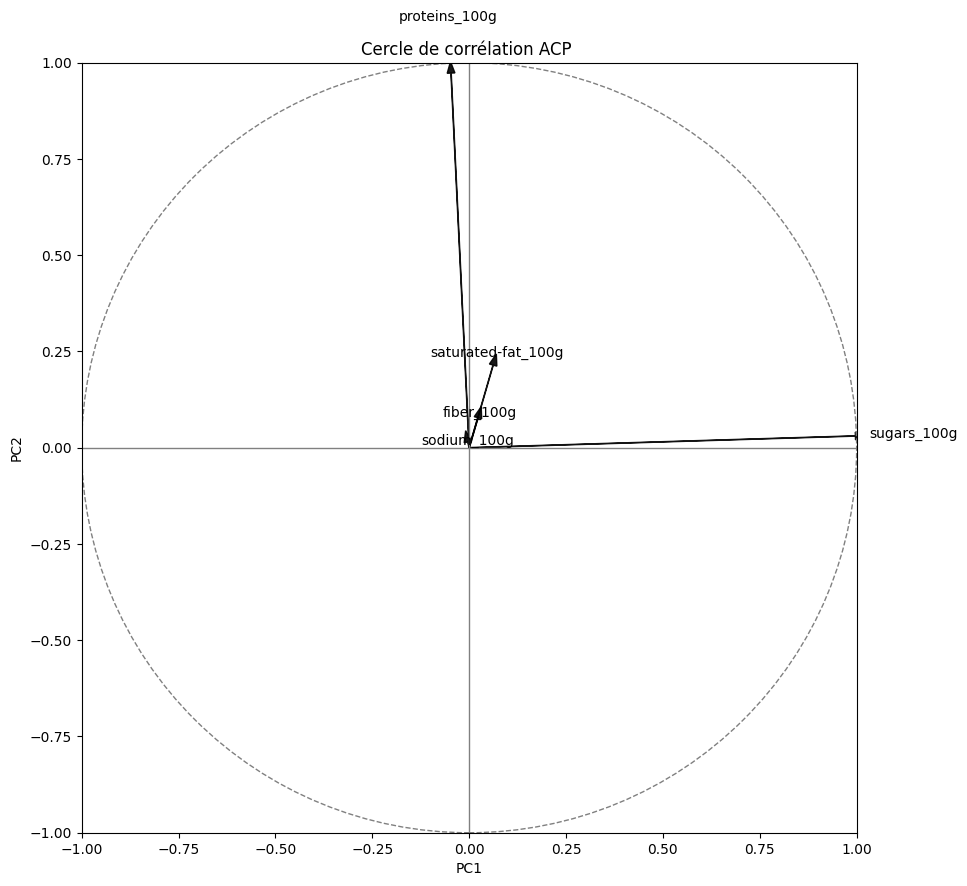

In [182]:
coeff = np.transpose(pca.components_[0:2, :])
n = coeff.shape[0]
xs = np.array([1, 0])
ys = np.array([0, 1])


plt.figure(figsize=(10, 10))


for i in range(n):
    plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='k', alpha=0.9, head_width=0.02)
    plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, X.columns[i], color='k', ha='center', va='center')


circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)


plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cercle de corrélation ACP ')

# Afficher la figure
plt.show()

Pour resumer ce cercle de corrélation , nous allons considerer le premier axe (pc1) comme étant les aliments impactant négativement la santé (augmente le nutri-score. Le deuxième axe quant à lui représente les aliments qui améliorent l'état sanitaire (diminue le nutri_score)